<a href="https://colab.research.google.com/github/LindeniMa/CODSOFT/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all dependencies
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

# ***Load Data***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv', sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# ***Analyze the Data***

In [ ]:
# checking for null values
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

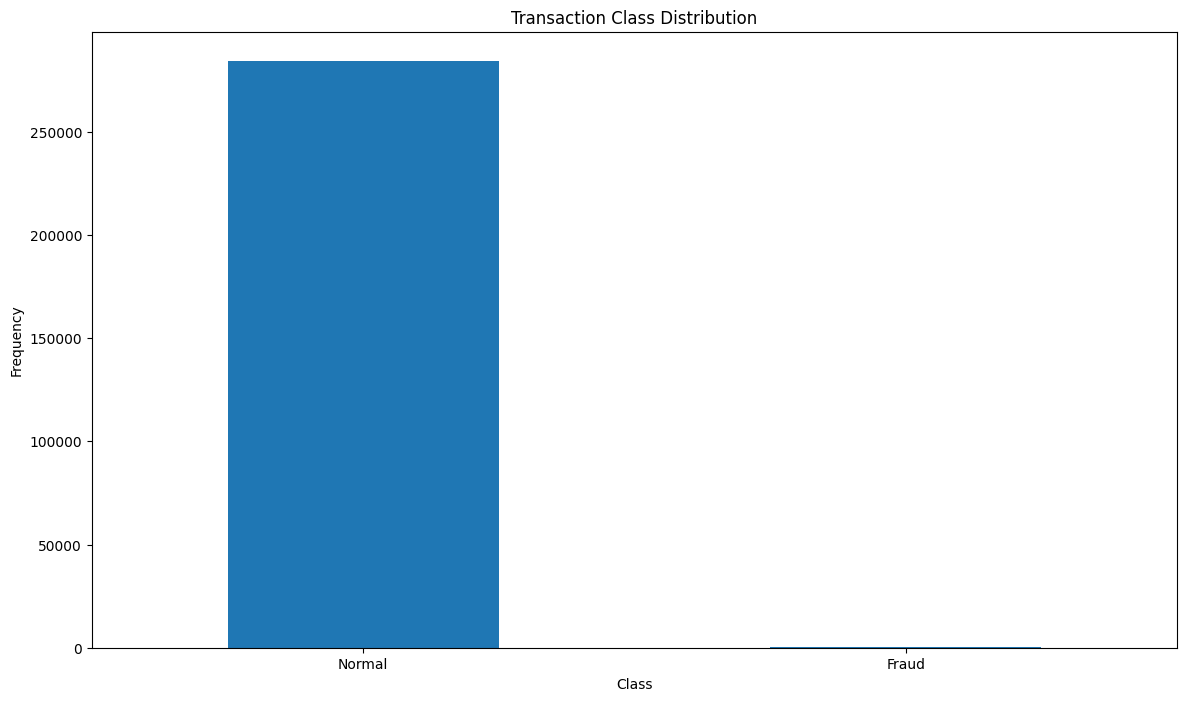

In [ ]:
# visualize the data
count_classes = pd.value_counts(data['Class'], sort= True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
# get the fraud and normal datasets

fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

In [ ]:
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

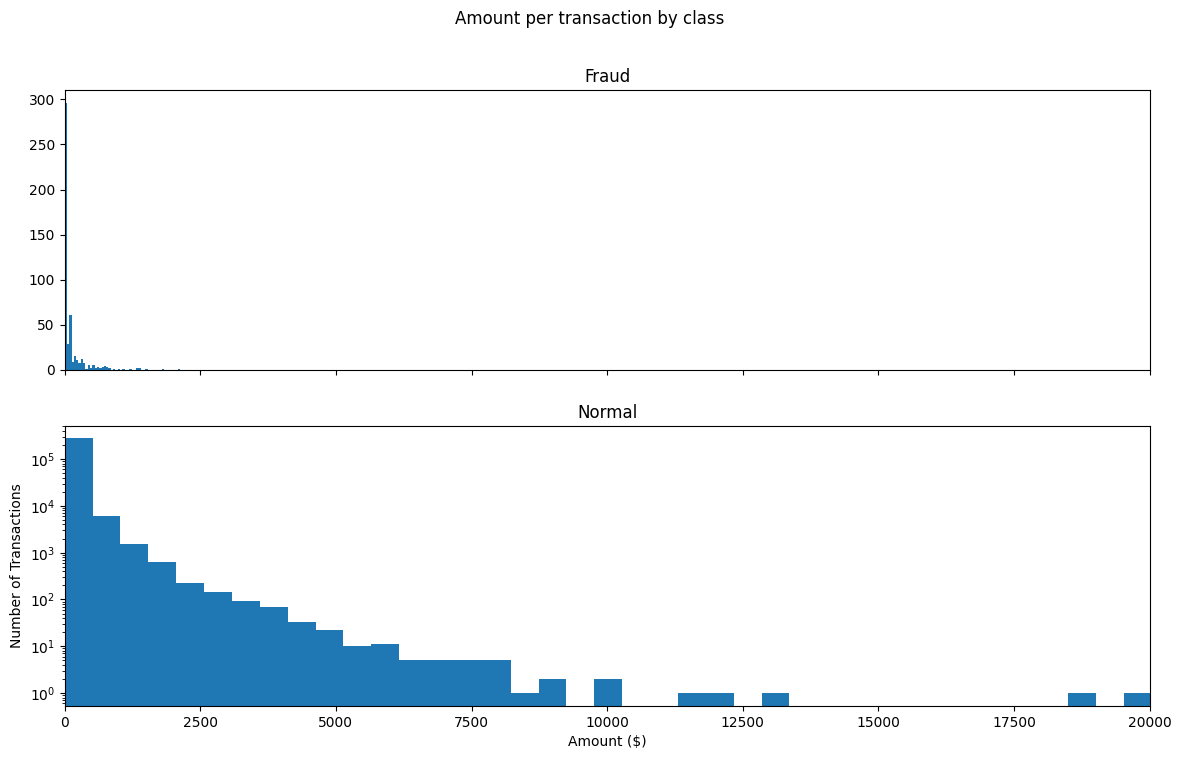

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim(0, 20000)
plt.yscale('log')
plt.show()

## *Data Visualization*

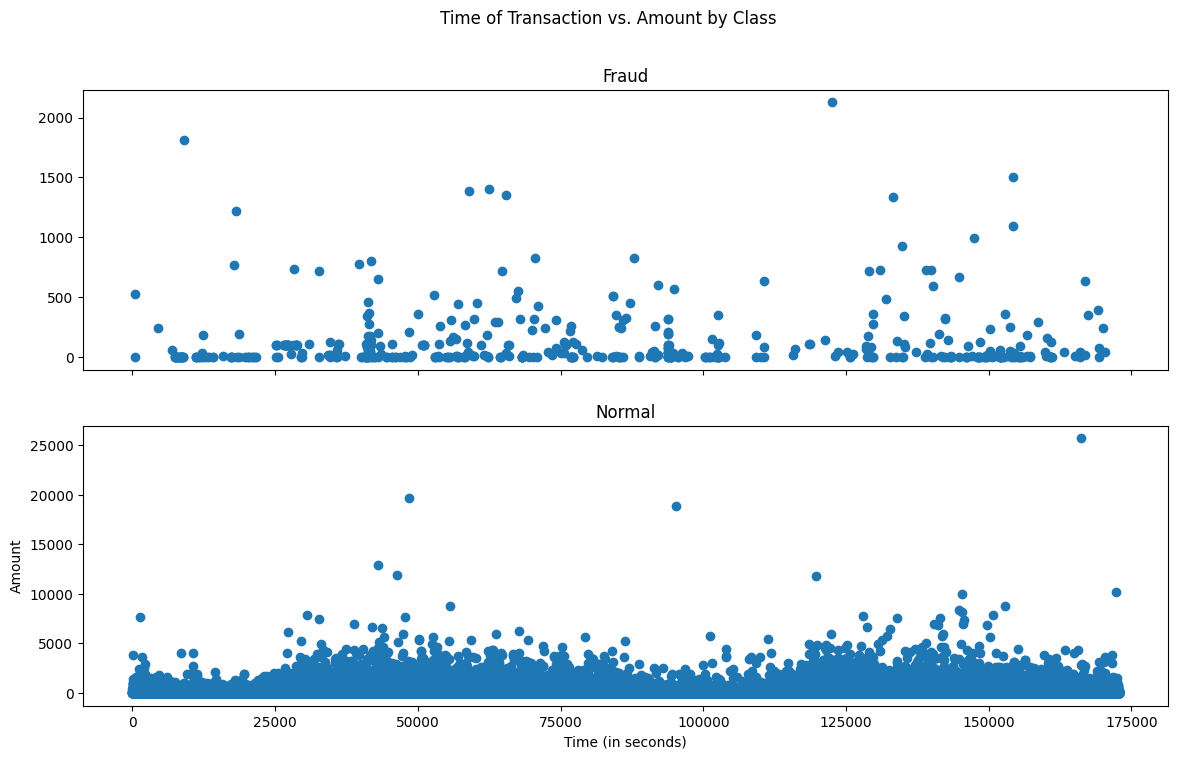

In [ ]:
# checking if fraudulent transactions occur more often
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle("Time of Transaction vs. Amount by Class")
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
# sample data
data1 = data.sample(frac = 0.1, random_state = 1)
data1.shape

(28481, 31)

In [ ]:
data.shape

(284807, 31)

In [ ]:
Fraud = data1[data1['Class'] == 1]
Valid = data1[data1['Class'] == 0]
outlier_fraction = len(Fraud) / float(len(Valid))

In [ ]:
print(outlier_fraction)

print("Fraud cases: {}".format(len(Fraud)))
print("Valid cases: {}".format(len(Valid)))

0.0017234102419808666
Fraud cases: 49
Valid cases: 28432


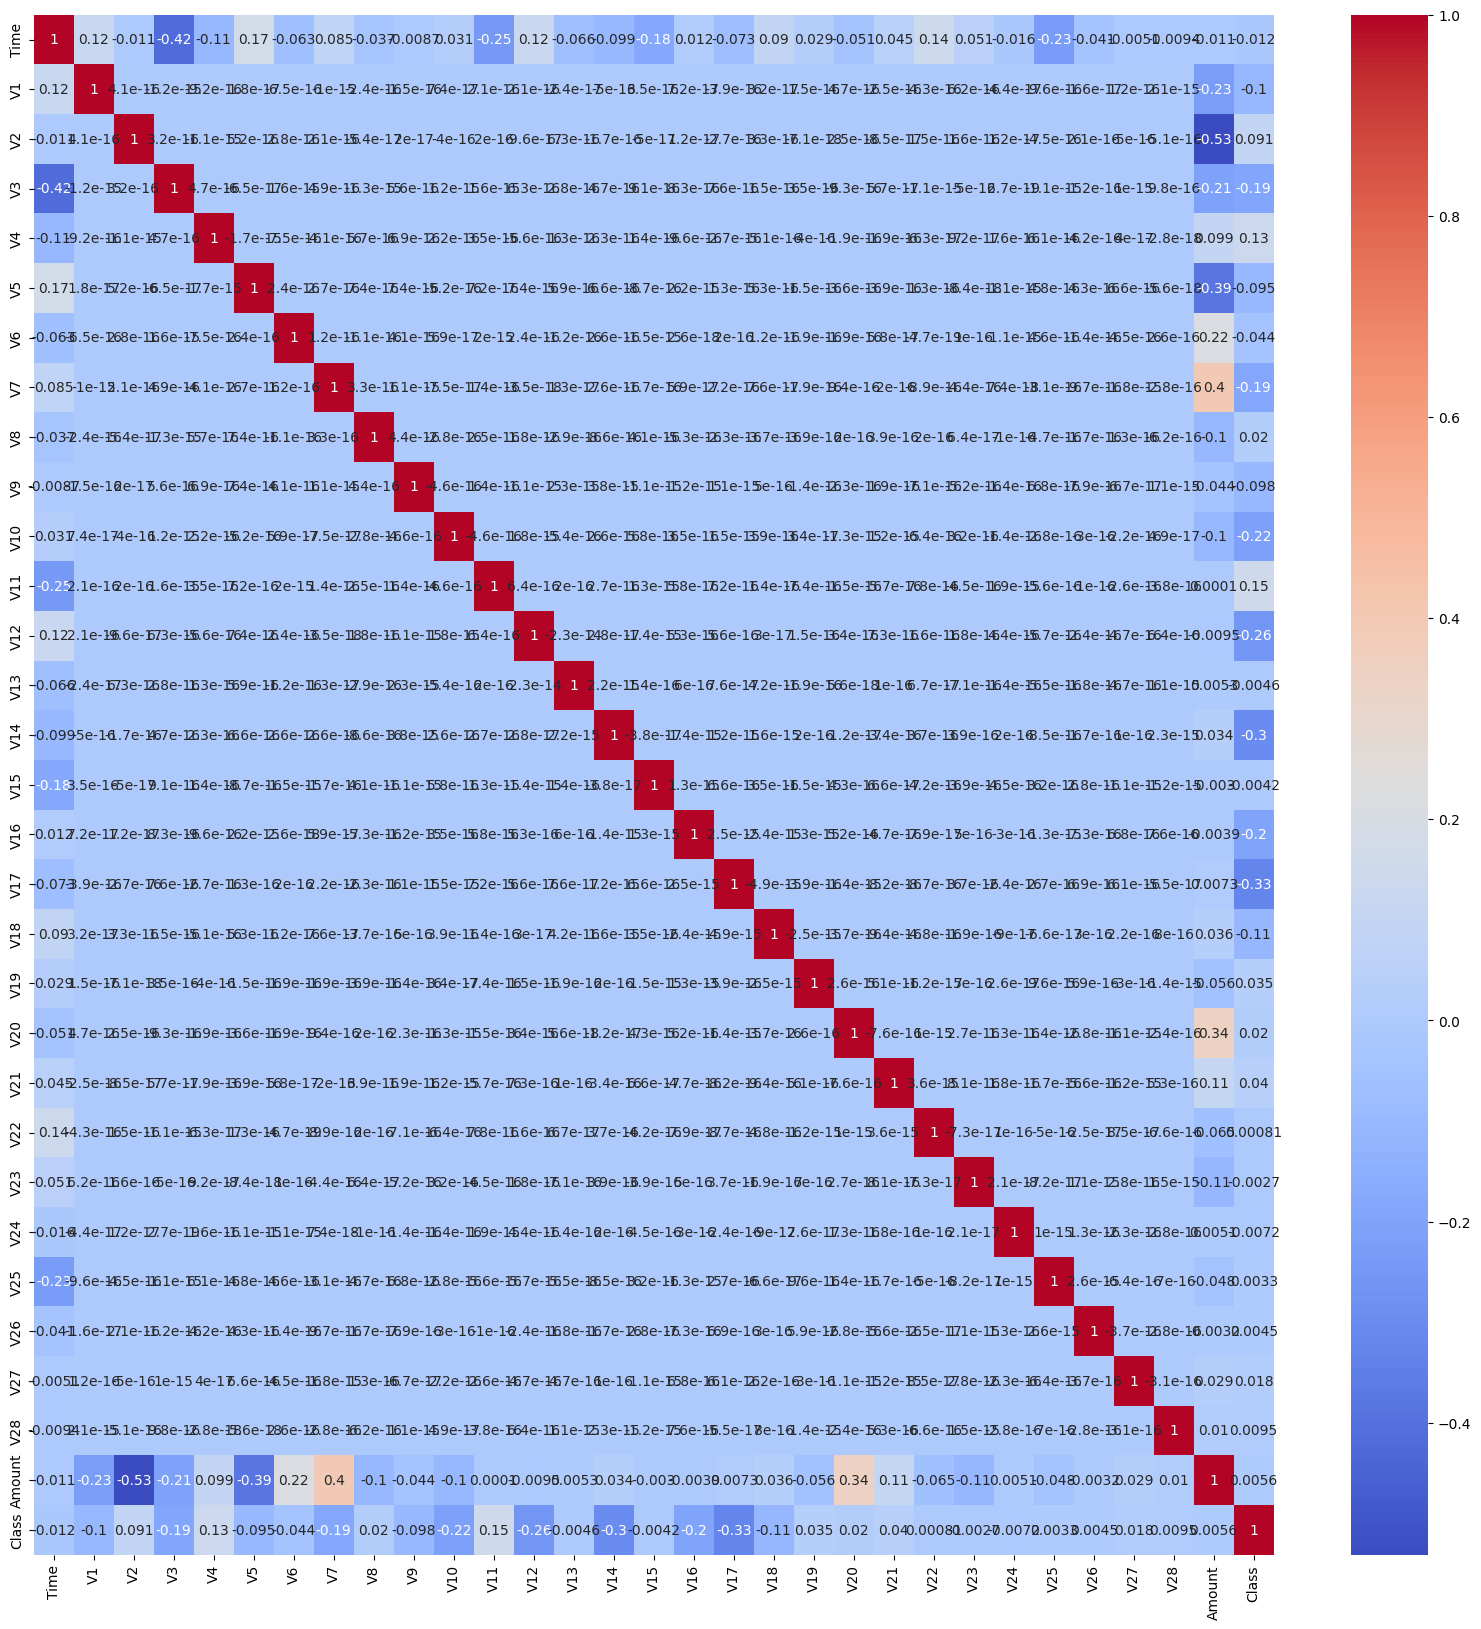

In [ ]:
# get the correlation of each feature in the dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))

# Heat Map
g = sns.heatmap(data[top_corr_features].corr(), annot = True, cmap = 'coolwarm')

In [ ]:
columns = data1.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"

state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_Outliers = state.uniform(low = 0, high = 1, size = (X.shape[1]))

print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


# ***Model Prediction***

In [ ]:
# define the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples= len(X),
                                        contamination = outlier_fraction, random_state = state, verbose = 0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm= 'auto',
                                               leaf_size=30, metric='minkowski',
                                               p=2, metric_params = None, contamination = outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05,
                                          max_iter=-1)
}

In [ ]:
type(classifiers)

dict

In [28]:
n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
  if clf_name == "Local Outlier Factor":
    y_pred = clf.fit_predict(X)
    scores_prediction =clf.negative_outlier_factor_
  elif clf_name == "Support Vector Machine":
    clf.fit(X)
    y_pred = clf.predict(X)
  else:
    clf.fit(X)
    scores_prediction = clf.decision_function(X)
    y_pred = clf.predict(X)

  y_pred[y_pred == 1] = 0
  y_pred[y_pred == -1] = 1
  n_errors = (y_pred != Y).sum()

  print("{}: {}".format(clf_name, n_errors))
  print("Accuracy Score: ")
  print(accuracy_score(Y, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 75
Accuracy Score: 
0.9973666654962958
Local Outlier Factor: 97
Accuracy Score: 
0.9965942207085425
Support Vector Machine: 8516
Accuracy Score: 
0.7009936448860644
